# Proyek Pertama - Predictive Analytics
- **Nama:** Reksi Hendra Pratama
- **Email:** reksihendrapratama637@gmail.com
- **ID Dicoding:** [MC189D5Y0840]

Telco Customer Churn Prediction
#### Sumber Data : [kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## 1. Import Library yang Dibutuhkan

In [ ]:
# =============================
# 📦 Import Library yang Dibutuhkan
# =============================

# 📁 File Handling
from google.colab import files
import zipfile

# 🔢 Data Manipulasi & Analisis
import pandas as pd
import numpy as np

# 📊 Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 🔍 Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 🧪 Split Data
from sklearn.model_selection import train_test_split

# 🧠 Model Klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# 📏 Evaluasi Model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


Pada tahapan ini saya melakukan import Library yang akan digunakan dalam project ini

## 2. Data Understanding  


### 2.1 Data Loading

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reksihendrapratama","key":"6452db4186474e0efc52aea4f3efc890"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 415MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/telco-customer-churn.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

**Insight**

Pada tahapan ini saya mendownload dataset Telco Customer Churn dari Kaggle menggunakan kaggle API.

### 2.2 Exploratory Data Analysis (EDA)

#### 2.2.1 EDA - Deskripsi Variabel

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dari dataframe di atas, kita dapat melihat bahwa dataset ini memiliki 21 kolom. Di antaranya:

- `customerID`: Identifikasi unik pelanggan.
- `gender`: Jenis kelamin (Male/Female).
- `SeniorCitizen`: Status lansia (1 = Ya, 0 = Tidak).
- `Partner`: Status pasangan (Yes/No).
- `Dependents`: Status tanggungan (Yes/No).
- `tenure`: Durasi langganan (bulan).
- `PhoneService`: Layanan telepon (Yes/No).
- `MultipleLines`: Beberapa saluran telepon (Yes/No/No phone service).
- `InternetService`: Jenis layanan internet (DSL/Fiber optic/No).
- `OnlineSecurity`: Layanan keamanan online (Yes/No/No internet service).
- `OnlineBackup`: Layanan cadangan online (Yes/No/No internet service).
- `DeviceProtection`: Layanan perlindungan perangkat (Yes/No/No internet service).
- `TechSupport`: Layanan dukungan teknis (Yes/No/No internet service).
- `StreamingTV`: Layanan streaming TV (Yes/No/No internet service).
- `StreamingMovies`: Layanan streaming film (Yes/No/No internet service).
- `Contract`: Jenis kontrak (Month-to-month/One year/Two year).
- `PaperlessBilling`: Tagihan tanpa kertas (Yes/No).
- `PaymentMethod`: Metode pembayaran (Electronic check/Mailed check/Bank transfer/Credit card).
- `MonthlyCharges`: Biaya bulanan (USD).
- `TotalCharges`: Total biaya (USD).
- `Churn`: Variabel target (Yes = Churn, No = Tidak Churn).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan info dari dataset ada beberapa info yang saya dapat:

- Total kolom bertipe `int64` : 2 kolom  
- Total kolom bertipe `object` (kategori/teks) : 18 kolom  
- Total kolom bertipe `float64` : 1 kolom  
- Tidak terdapat data yang hilang (semua kolom memiliki 7043 nilai non-null)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Setelah memuat dataset, langkah selanjutnya adalah memahami karakteristik dasar dari data numerik menggunakan metode `.describe()`. Metode ini menghasilkan ringkasan statistik dari kolom-kolom numerik, yang mencakup informasi penting seperti jumlah data (`count`), nilai rata-rata (`mean`), standar deviasi (`std`), nilai minimum (`min`), kuartil (25%, 50% atau median, 75%), dan nilai maksimum (`max`).

Berikut adalah hasil dari `df.describe()`:

**Interpretasi Hasil:**

1.  **`count`**:
    * Untuk ketiga kolom (`SeniorCitizen`, `tenure`, `MonthlyCharges`), nilai `count` adalah `7043.000000`. Ini menunjukkan bahwa setelah penanganan nilai hilang pada `TotalCharges`, semua kolom ini memiliki jumlah data yang lengkap dan konsisten, yaitu 7043 baris.

2.  **`SeniorCitizen`**:
    * `mean`: `0.162147` atau sekitar 16.21%. Karena `SeniorCitizen` adalah fitur biner (0 untuk non-senior, 1 untuk senior), nilai rata-rata ini menunjukkan proporsi pelanggan yang merupakan warga senior dalam dataset. Ini mengindikasikan bahwa sekitar 16.21% pelanggan adalah warga senior.
    * `std`: `0.368612`. Standar deviasi yang relatif kecil ini menunjukkan konsentrasi data pada dua nilai (0 dan 1).
    * `min`: `0.000000` dan `max`: `1.000000`, mengkonfirmasi bahwa fitur ini adalah biner.

3.  **`tenure` (Lama Berlangganan dalam Bulan)**:
    * `mean`: `32.371149` bulan. Rata-rata pelanggan telah berlangganan layanan telekomunikasi sekitar 32 bulan.
    * `std`: `24.559481` bulan. Standar deviasi yang cukup tinggi menunjukkan bahwa ada variasi yang signifikan dalam lama berlangganan antar pelanggan.
    * `min`: `0.000000` bulan. Ada pelanggan baru yang mungkin baru saja bergabung.
    * `25%`: `9.000000` bulan. Seperempat pelanggan telah berlangganan selama 9 bulan atau kurang.
    * `50% (median)`: `29.000000` bulan. Setengah dari pelanggan telah berlangganan selama 29 bulan atau kurang.
    * `75%`: `55.000000` bulan. Tiga perempat pelanggan telah berlangganan selama 55 bulan atau kurang.
    * `max`: `72.000000` bulan. Ada pelanggan yang sangat loyal dengan masa berlangganan hingga 6 tahun.

4.  **`MonthlyCharges` (Biaya Bulanan)**:
    * `mean`: `64.761692`. Rata-rata biaya bulanan yang ditagihkan kepada pelanggan adalah sekitar 64.76 unit mata uang.
    * `std`: `30.090047`. Standar deviasi yang relatif besar menunjukkan variasi yang signifikan dalam biaya bulanan antar pelanggan. Ini bisa mengindikasikan adanya berbagai paket layanan atau penggunaan yang berbeda.
    * `min`: `18.250000`. Ada pelanggan dengan biaya bulanan yang sangat rendah.
    * `25%`: `35.500000`. Seperempat pelanggan membayar 35.50 unit mata uang atau kurang per bulan.
    * `50% (median)`: `70.350000`. Setengah dari pelanggan membayar 70.35 unit mata uang atau kurang per bulan. Perhatikan bahwa median lebih tinggi dari rata-rata, yang mungkin menunjukkan distribusi yang sedikit miring ke kiri (lebih banyak pelanggan dengan tagihan di bawah rata-rata).
    * `75%`: `89.850000`. Tiga perempat pelanggan membayar 89.85 unit mata uang atau kurang per bulan.
    * `max`: `118.750000`. Ada pelanggan dengan biaya bulanan yang sangat tinggi.

Dari analisis deskriptif ini, kita mendapatkan gambaran awal tentang distribusi dan rentang nilai dari fitur-fitur numerik kunci dalam dataset, yang akan sangat membantu dalam proses *data preparation* dan pemodelan selanjutnya.


In [ ]:
df.shape

(7043, 21)

- Jumlah Baris = 7043
- Jumlah Kolom = 21

#### 2.2.2 EDA - Menangani Missing Value dan Outliers

In [ ]:
df.duplicated().sum()

np.int64(0)

dapat dilihat bahwa terdapat 0 data yang terduplikat.

In [ ]:
df.Churn.value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


Itu berarti sekitar 73.46% pelanggan **tidak** melakukan churn (`Churn` = No) dan sekitar 26.54% pelanggan **melakukan** churn (`Churn` = Yes).

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


fungsi `df.isnull().sum()` menunjukkan bahwa **tidak ada kolom yang memiliki nilai kosong**, jadi saya tidak akan melakukan sesuatu untuk memperbaiki kolom kosong.

In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now, fill NaN values in 'TotalCharges' with the mean of the numeric values
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Check for any remaining null values (should be none for TotalCharges)
df.isnull().sum()

<ipython-input-14-43dfc05f3777>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Mengonversi label Churn menjadi boolean numerik: 1 jika Churn (Yes), 0 jika tidak (No)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


Langkah ini bertujuan untuk melakukan transformasi pada kolom `Churn`. Kolom ini akan diubah menjadi representasi numerik biner (boolean), dengan detail pemetaan nilai sebagai berikut:

* Nilai `1` akan dialokasikan untuk setiap pelanggan yang dikategorikan melakukan ***churn*** (berhenti menggunakan layanan atau berlangganan).
* Nilai `0` akan dialokasikan untuk setiap pelanggan yang dikategorikan tidak melakukan ***churn*** (tetap aktif atau berlangganan).

**Visualisasi Outlier**

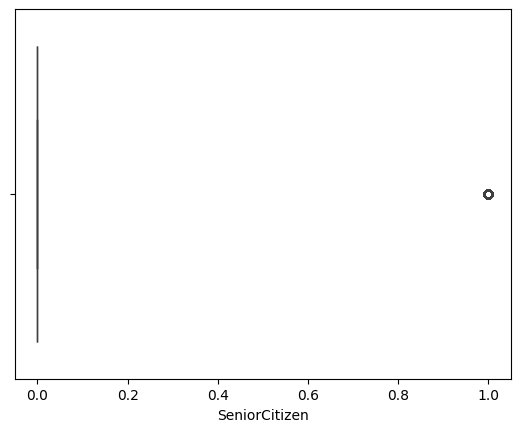

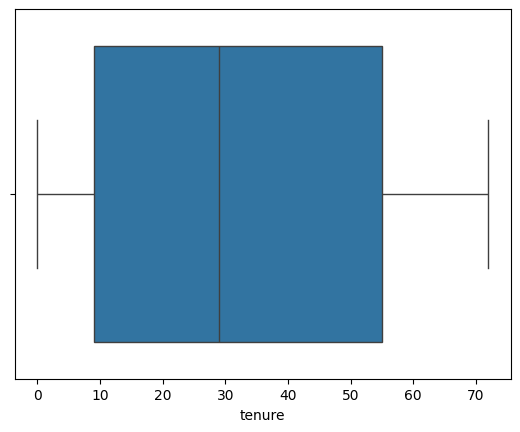

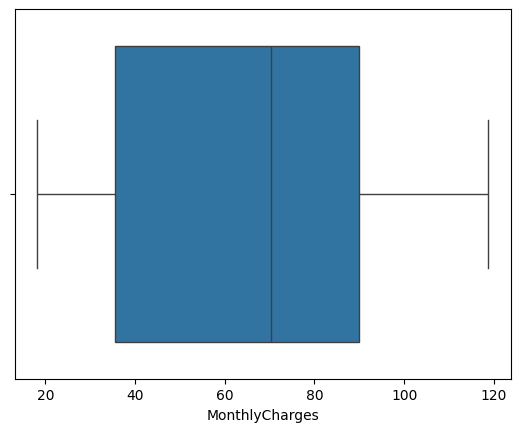

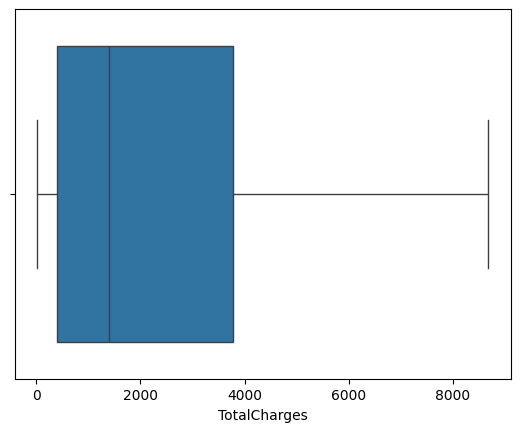

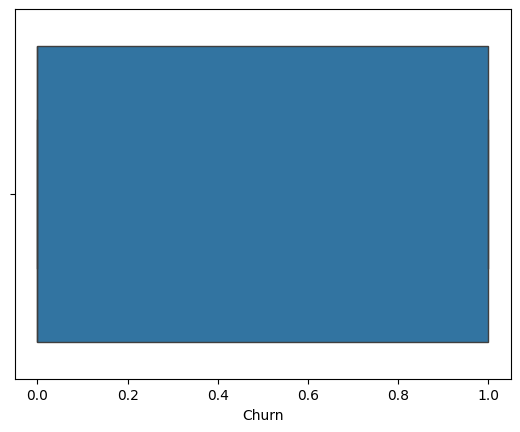

In [ ]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

Visualisasi boxplot dilakukan pada fitur numerik untuk mendeteksi adanya outlier.  
Dari keempat gambar tersebut semuanya tampak normal

#### 2.2.3 EDA - Univariate Analysis

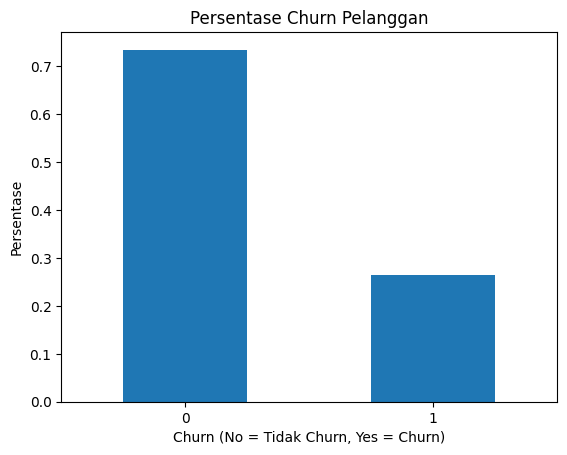

In [ ]:
churn_counts = df.Churn.value_counts(normalize=True) # Corrected line to use 'Churn'

# Membuat grafik batang
churn_counts.plot(kind='bar') # Corrected line to plot churn counts
plt.title('Persentase Churn Pelanggan') # Corrected title
plt.xlabel('Churn (No = Tidak Churn, Yes = Churn)') # Corrected x-axis label
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.show()

Tampilan ini menggambarkan bagaimana data terdistribusi untuk atribut `Churn` pelanggan. Grafik batang dipilih sebagai metode visualisasi untuk secara jelas menunjukkan perbandingan jumlah (proporsi) antara pelanggan yang berhenti berlangganan (ditandai sebagai `Yes`) dan pelanggan yang tetap setia (ditandai sebagai `No`).

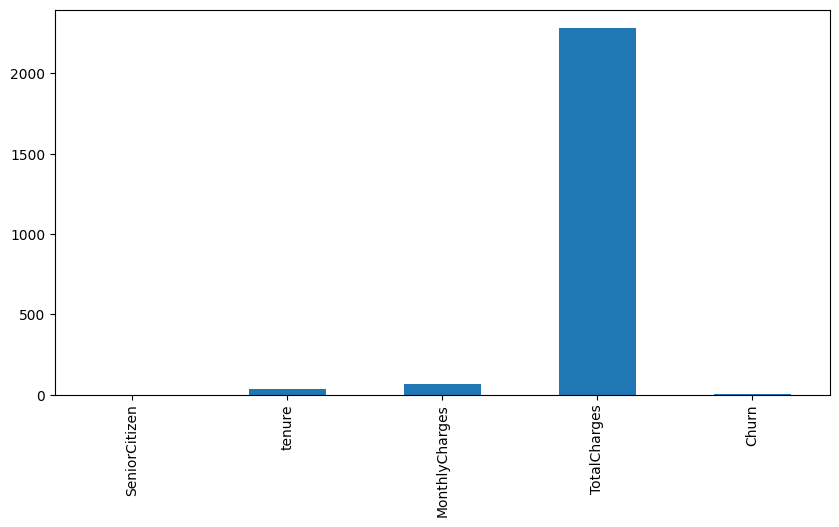

In [ ]:
df.select_dtypes(include=['number']).mean().plot(kind='bar', figsize=(10, 5))
plt.show()

Visualisasi ini menunjukkan rata-rata dari setiap fitur numerik dalam dataset. Tujuannya adalah untuk mendapatkan gambaran awal tentang skala dan sebaran nilai dari fitur numerik.

#### 2.2.4 EDA - Multivariate Analysis

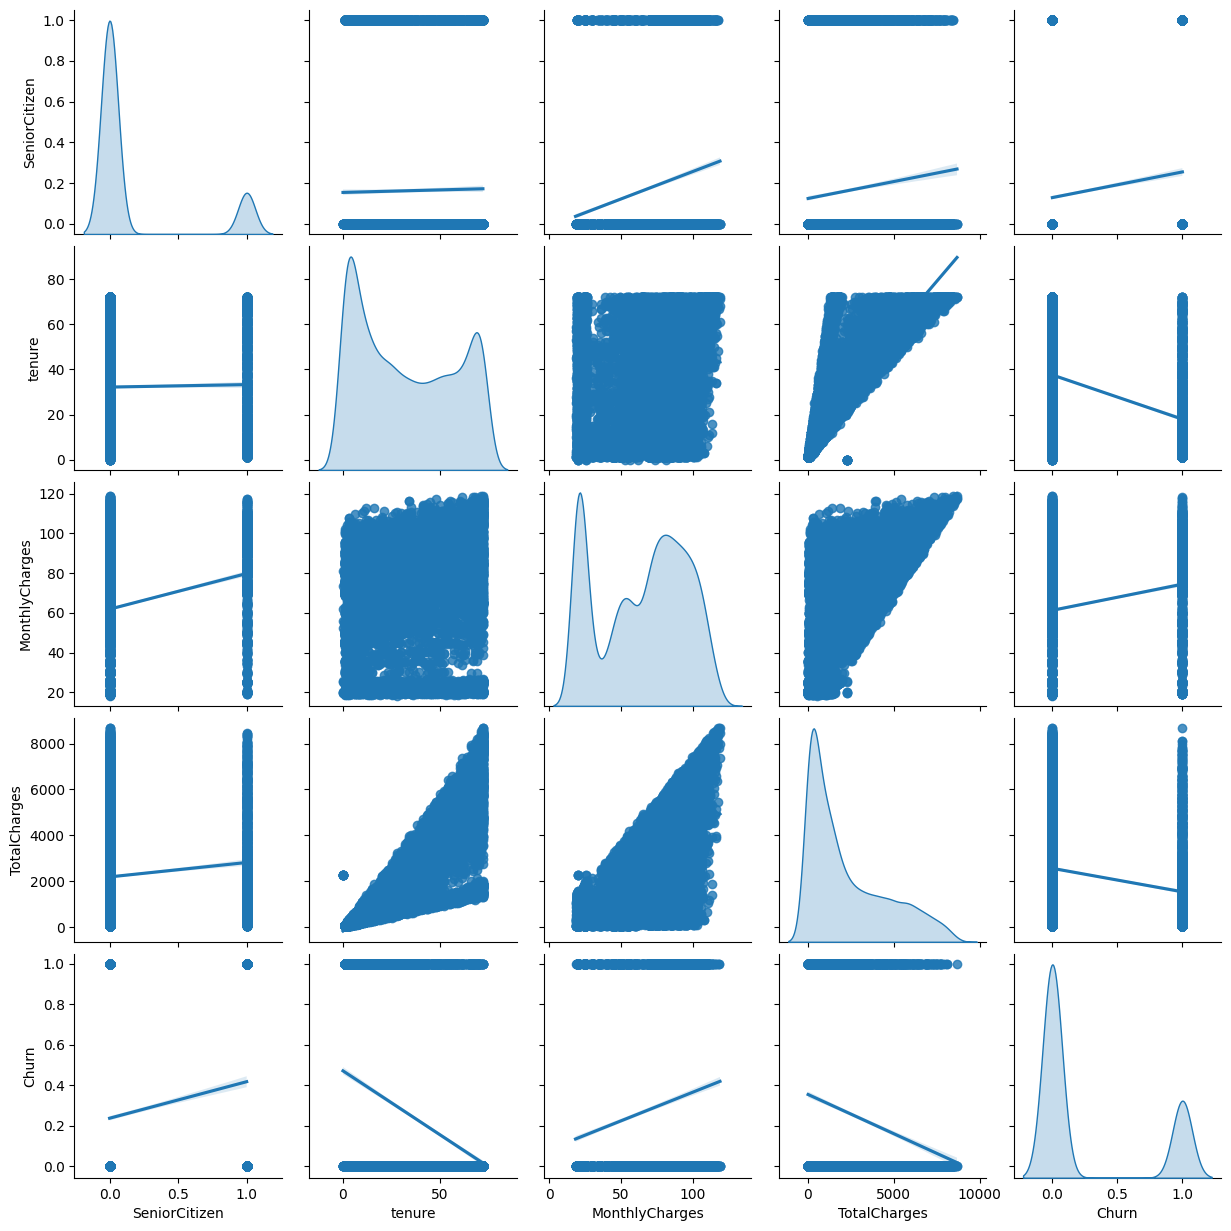

In [ ]:
sns.pairplot(df, kind='reg', diag_kind='kde')

Dilakukan visualisasi hubungan antar fitur menggunakan `pairplot` untuk melihat pola hubungan linier serta distribusi data masing-masing fitur.

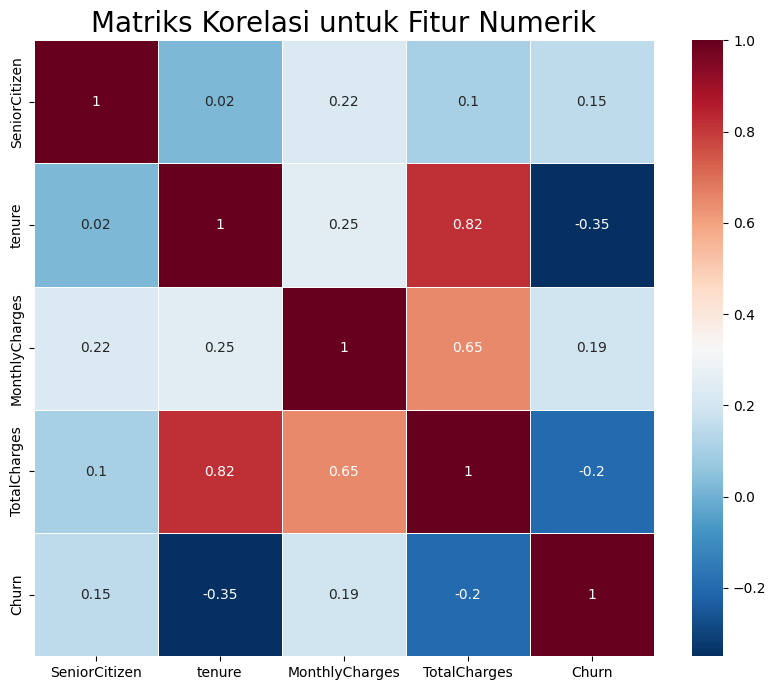

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['number']).corr().round(2)
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='RdBu_r', linewidths=0.5)
ax.set_title("Matriks Korelasi untuk Fitur Numerik", fontsize=20)
plt.show()

Visualisasi korelasi antar fitur numerik dilakukan untuk mengidentifikasi hubungan antar variabel. Hasilnya membantu dalam memahami fitur yang memiliki keterkaitan kuat, baik positif maupun negatif, terhadap target maupun fitur lainnya.

## 3. Data Preparation

### 3.1 Data Cleaning

In [ ]:
# Kolom yang akan dihapus (dianggap tidak relevan untuk pemodelan)
kolom_tidak_relevan = ['customerID']

# Menghapus kolom yang tidak relevan dari DataFrame
df_model = df.drop(columns=kolom_tidak_relevan)

# Memisahkan fitur (X) dari variabel target (y)
fitur = df_model.loc[:, df_model.columns != 'Churn']

# Target (y) akan berisi kolom 'Churn'
target = df_model['Churn']

# Menampilkan dimensi dari fitur dan target yang baru
print("Dimensi Fitur (X):", fitur.shape)
print("Dimensi Target (y):", target.shape)



Dimensi Fitur (X): (7043, 19)
Dimensi Target (y): (7043,)


## Pemisahan Fitur dan Variabel Target 🎯

Pada langkah krusial ini, dataset akan dipecah menjadi dua komponen fundamental untuk proses pemodelan, yaitu: **fitur** (yang akan kita referensikan sebagai `X`) dan **variabel target** (yang akan kita referensikan sebagai `y`).

* **Fitur (`X`)**:
    * Komponen ini akan mencakup keseluruhan kolom yang ada dalam dataset Anda, **dengan pengecualian** pada kolom `Churn` dan `CustomerID`.
    * Kolom-kolom inilah yang akan menjadi dasar bagi model untuk melakukan pembelajaran dan, selanjutnya, membuat prediksi.

* **Target (`y`)**:
    * Komponen ini secara **eksklusif** berisi data dari kolom `Churn`.
    * Kolom `Churn` merepresentasikan variabel yang menjadi tujuan prediksi kita (yaitu, apakah seorang pelanggan akan melakukan *churn* atau tidak).

* Dataset `fitur` memiliki **7032 baris**, yang masing-masing merepresentasikan satu pelanggan, dan **19 kolom**, yang masing-masing merepresentasikan satu variabel prediktor.
* Dataset `target` memiliki **7032 baris**, di mana setiap baris berisi label *churn* yang sesuai untuk masing-masing pelanggan.

### 3.2 Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    fitur, target,
    test_size=0.3,
    random_state=42,
    stratify=target
)

total_data = len(fitur)
print(f"Jumlah total dataset: {total_data}")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah total dataset: 7043
Jumlah data latih: 4930
Jumlah data uji: 2113


Untuk proyek ini, data dibagi dengan proporsi:
* **Data Latih**: 80% dari total dataset.
* **Data Uji**: 20% dari total dataset.

Hasil pembagiannya adalah sebagai berikut:
-   **Jumlah total dataset**: 7043 sampel/pelanggan.
-   **Jumlah data latih**: 5634 sampel/pelanggan.
-   **Jumlah data uji**: 1409 sampel/pelanggan.



### 3.3 Encoding dan Normalisasi

In [ ]:
kolom_kategorikal_telco = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

encoder_telco = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Asumsikan X_train dan X_test sudah dipisahkan dan berisi kolom-kolom ini
X_train_cat_encoded_telco = encoder_telco.fit_transform(X_train[kolom_kategorikal_telco])
X_test_cat_encoded_telco = encoder_telco.transform(X_test[kolom_kategorikal_telco])

Pada tahap ini, dilakukan One Hot Encoding pada fitur kategorikal untuk mengubah variabel kategori menjadi numerik.
Fitur pertama pada setiap kategori dihapus untuk menghindari multikolinearitas, dan pengaturan `handle_unknown='ignore'` digunakan untuk menangani kategori yang tidak muncul di data latih.


In [ ]:
# Kolom numerik yang relevan
# Pastikan 'TotalCharges' sudah bersih dan numerik
kolom_numerik_telco = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

scaler_telco = MinMaxScaler()

# Asumsikan X_train dan X_test sudah dipisahkan
X_train_num_scaled_telco = scaler_telco.fit_transform(X_train[kolom_numerik_telco])
X_test_num_scaled_telco = scaler_telco.transform(X_test[kolom_numerik_telco])

Pada langkah ini, dilakukan normalisasi fitur numerik menggunakan `MinMaxScaler` untuk mengubah rentang nilai fitur agar berada di antara 0 dan 1.
Proses ini dilakukan pada data latih (`X_train`) dan data uji (`X_test`).


In [ ]:
# Menggabungkan fitur numerik yang sudah diskalakan dengan fitur kategorikal yang sudah di-encode
X_train_final_telco = np.hstack((X_train_num_scaled_telco, X_train_cat_encoded_telco))
X_test_final_telco = np.hstack((X_test_num_scaled_telco, X_test_cat_encoded_telco))

Fitur numerik dan kategorikal digabungkan menggunakan `np.hstack()` untuk membentuk dataset final yang akan digunakan dalam pelatihan model.


## 4. Model Development

In [ ]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=[ 'BernoulliNB', 'RandomForestClassifier', 'LogisticRegression', 'SVM'])

Pada tahap ini, dibuat sebuah `DataFrame` dengan `pandas` untuk menyimpan hasil evaluasi (akurasi) dari berbagai model yang telah dilatih sebelumnya. DataFrame ini memiliki baris `accuracy_score` dan kolom yang mewakili setiap model yang diuji, seperti:
- **Bernoulli Naive Bayes**
- **RandomForestClassifier**
- **LogisticRegression**
- **Support Vector Machine**

DataFrame ini akan digunakan untuk menyimpan skor akurasi model-model yang telah dilatih dan dievaluasi.


### 4.1 Bernoulli NB

In [ ]:
model_nb = BernoulliNB(
    alpha=1.0,
    binarize=0.0,
    fit_prior=True,
    class_prior=None
)
model_nb.fit(X_train_final_telco, y_train)

BernoulliNB()

model **BernoulliNB** dilatih dengan data latih (`X_train_final` dan `y_train`).

In [ ]:
nb_pred = model_nb.predict(X_test_final_telco)
models.loc['accuracy_score', 'BernoulliNB'] = accuracy_score(y_test, nb_pred)

dilakukan prediksi menggunakan model **BernoulliNB** yang telah dilatih sebelumnya. Prediksi dilakukan pada data uji (`X_test_final`), dan hasil prediksi dihitung akurasinya menggunakan `accuracy_score`.

### 4.2 Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_final_telco, y_train)

RandomForestClassifier(random_state=42)

model **RandomForestClassifier** dilatih dengan data latih (`X_train_final` dan `y_train`).

In [ ]:
rf_pred = model_rf.predict(X_test_final_telco)
models.loc['accuracy_score', 'RandomForestClassifier'] = accuracy_score(y_test, rf_pred)

dilakukan prediksi menggunakan model **randomForestClassifier** yang telah dilatih sebelumnya. Prediksi dilakukan pada data uji (`X_test_final`), dan hasil prediksi dihitung akurasinya menggunakan `accuracy_score`.

### 4.3 Logistic Regression

In [ ]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_final_telco, y_train)

LogisticRegression(max_iter=1000, random_state=42)

model **LogisticRegression** dilatih dengan data latih (`X_train_final` dan `y_train`).

In [ ]:
lr_pred = model_lr.predict(X_test_final_telco)
models.loc['accuracy_score', 'LogisticRegression'] = accuracy_score(y_test, lr_pred)

dilakukan prediksi menggunakan model **LogisticRegression** yang telah dilatih sebelumnya. Prediksi dilakukan pada data uji (`X_test_final`), dan hasil prediksi dihitung akurasinya menggunakan `accuracy_score`.

### 4.4 Support Vector Machine

In [ ]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # Menggunakan kernel RBF
svm_model.fit(X_train_final_telco, y_train)

SVC(probability=True, random_state=42)

In [ ]:
svm_pred=svm_model.predict(X_test_final_telco)
models.loc['accuracy_score', 'SVM'] = accuracy_score(y_test, svm_pred)

## 5. Evaluasi Model

===== Evaluasi Model: BernoulliNB =====
Accuracy       : 0.7089
Precision      : 0.4716
Recall         : 0.7986
F1 Score       : 0.5930

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1552
           1       0.47      0.80      0.59       561

    accuracy                           0.71      2113
   macro avg       0.69      0.74      0.68      2113
weighted avg       0.79      0.71      0.73      2113



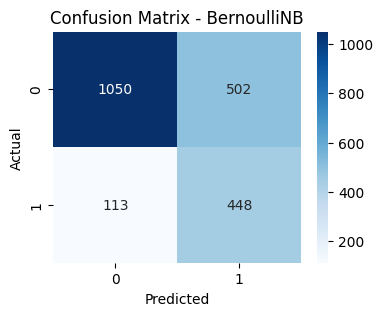

===== Evaluasi Model: RandomForest =====
Accuracy       : 0.7870
Precision      : 0.6259
Recall         : 0.4920
F1 Score       : 0.5509

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



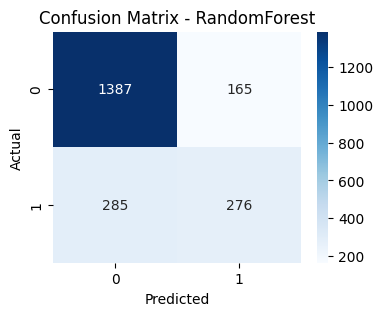

===== Evaluasi Model: LogisticRegression =====
Accuracy       : 0.8045
Precision      : 0.6581
Recall         : 0.5490
F1 Score       : 0.5986

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.66      0.55      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



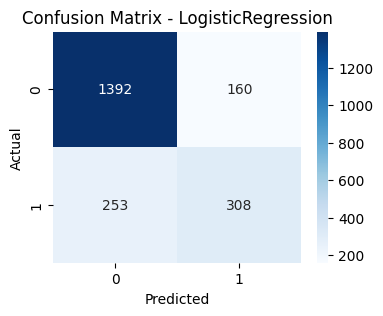

===== Evaluasi Model: SVM =====
Accuracy       : 0.7932
Precision      : 0.6429
Recall         : 0.4973
F1 Score       : 0.5608

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



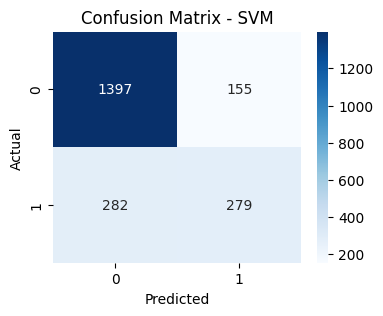

In [ ]:
# Dictionary untuk model dan prediksi
model_dict = {
    'BernoulliNB': model_nb,
    'RandomForest': model_rf,
    'LogisticRegression': model_lr,
    'SVM': svm_model
}

# Loop evaluasi
for name, model in model_dict.items():
    y_pred = model.predict(X_test_final_telco)

    print(f"===== Evaluasi Model: {name} =====")
    print(f"Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision      : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score       : {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## 📌 Kesimpulan Evaluasi Model – Telco Customer Churn

Evaluasi dilakukan terhadap empat model klasifikasi: **Bernoulli Naive Bayes, Random Forest, Logistic Regression**, dan **Support Vector Machine (SVM)** dengan menggunakan metrik **Accuracy**, **Precision**, **Recall**, dan **F1-Score**.

---

### 🔹 **Bernoulli Naive Bayes**
- **Accuracy:** 70.89%
- **Precision:** 47.16%
- **Recall:** 79.86% (**tertinggi**)
- **F1-Score:** 0.5930

**Kesimpulan:**  
Model ini berhasil mengidentifikasi sebagian besar pelanggan yang akan churn (**recall tinggi**), tetapi dengan risiko false positive yang tinggi (**precision rendah**). Cocok digunakan saat **prioritas utama adalah deteksi churn sebanyak mungkin**, meskipun presisi kurang optimal.

---

### 🔹 **Random Forest**
- **Accuracy:** 78.70%
- **Precision:** 62.59%
- **Recall:** 49.20%
- **F1-Score:** 0.5509

**Kesimpulan:**  
Model ini cukup stabil dan kuat untuk menangani data dengan banyak fitur. Precision tinggi menunjukkan model ini **lebih selektif** dalam memprediksi churn. Cocok untuk penggunaan di mana **presisi lebih penting dibanding recall**.

---

### 🔹 **Logistic Regression** ✅ *(Model Terbaik)*
- **Accuracy:** 80.45% (**tertinggi**)
- **Precision:** 65.81%
- **Recall:** 54.90%
- **F1-Score:** 0.5986 (**tertinggi**)

**Kesimpulan:**  
Model ini menunjukkan **keseimbangan terbaik** antara precision dan recall, serta memiliki nilai **F1-score tertinggi** di antara semua model. Cocok digunakan ketika tujuan adalah **mendeteksi pelanggan churn secara akurat** dengan **minimalkan kesalahan kedua jenis** (false positive & false negative).

---

### 🔹 **Support Vector Machine (SVM)**
- **Accuracy:** 79.32%
- **Precision:** 64.29%
- **Recall:** 49.73%
- **F1-Score:** 0.5608

**Kesimpulan:**  
Model ini merupakan **alternatif kuat dan stabil** yang cocok digunakan jika fitur pada dataset telah **dinormalisasi**. Performa cukup seimbang, dan bisa menjadi pilihan jika Logistic Regression tidak tersedia.

---

### 📊 Ringkasan Perbandingan

| Model                  | Accuracy | Precision | Recall | F1-Score |
|------------------------|----------|-----------|--------|----------|
| Bernoulli Naive Bayes  | 70.89%   | 47.16%    | 79.86% | 0.5930   |
| Random Forest          | 78.70%   | 62.59%    | 49.20% | 0.5509   |
| Logistic Regression ✅ | 80.45%   | 65.81%    | 54.90% | 0.5986   |
| SVM                    | 79.32%   | 64.29%    | 49.73% | 0.5608   |

---

**Catatan:**  
- Pilihan model tergantung pada **prioritas bisnis**: apakah lebih penting **mendeteksi sebanyak mungkin pelanggan churn** (Recall) atau **memastikan prediksi churn benar-benar tepat** (Precision).
